## LOGISTIC REGRESSION

In [50]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, classification_report, confusion_matrix
import statsmodels.formula.api as smf

warnings.filterwarnings("ignore")
%matplotlib inline

### 1. Data Exploration

In [52]:
# Importing Dataset
data = pd.read_csv("Titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
data.shape

(891, 12)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
# Checking for Null Values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Since Age and Cabin have significant number of null values, we can not remove them, we may miss some important data. Hence we use imputation method.

In [56]:
# Impute missing values
# For Age, we'll use the median to fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)

# For Embarked, we'll use the mode to fill missing values
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# For Cabin, we'll fill missing values with 'Unknown'
data['Cabin'].fillna('Unknown', inplace=True)

# Verify if there are any missing values left
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [57]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [58]:
# Encode categorical variables using get_dummies
data_1 = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Drop irrelevant or non-numeric features for modeling
data_1.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], inplace=True)

# Display the first few rows of the preprocessed dataset
data_1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [59]:
data_1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


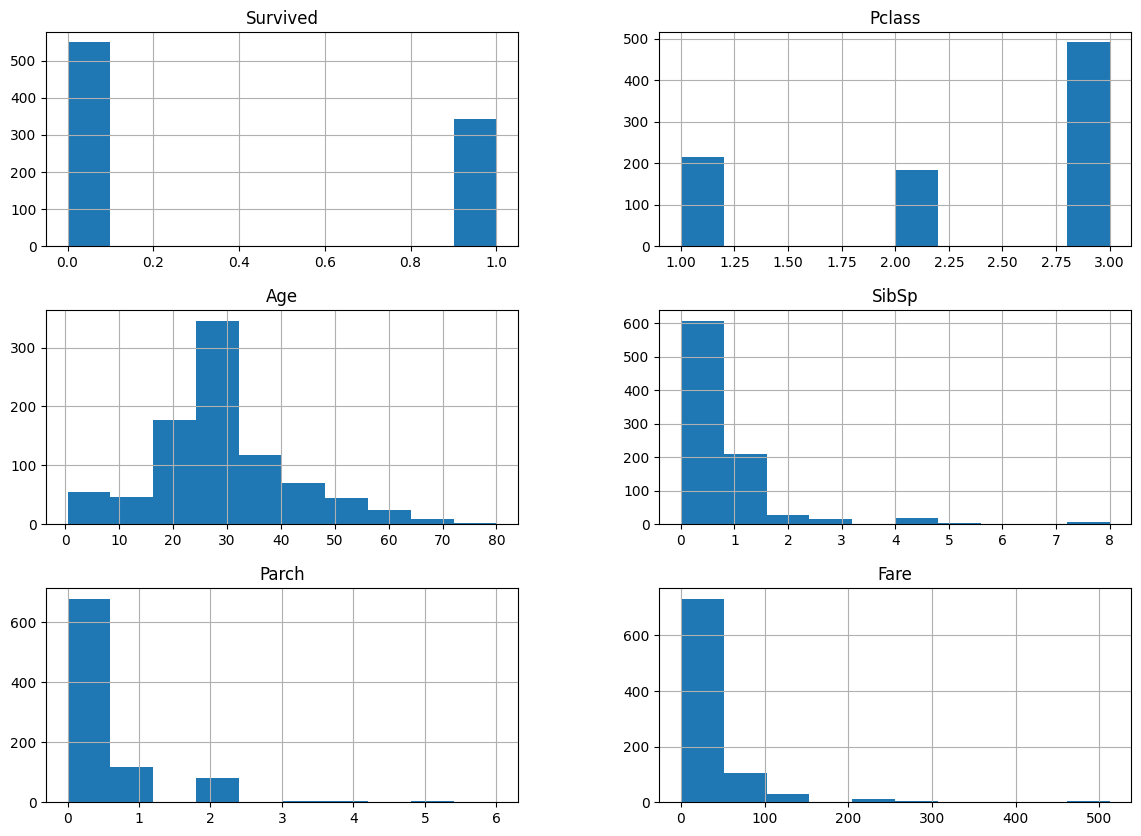

In [60]:
# Outlier detection
data_1.hist(figsize=[14, 10])
plt.show()

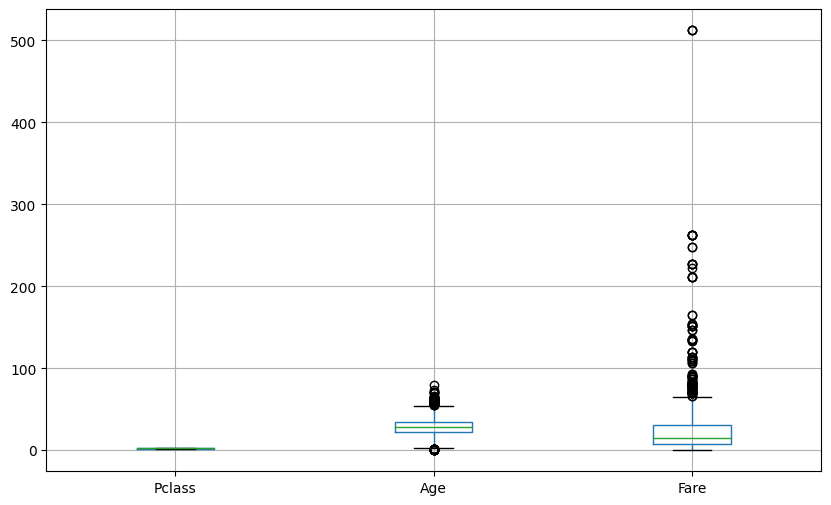

In [61]:
data_1[['Pclass', 'Age', 'Fare']].boxplot(figsize=[10, 6])
plt.show()

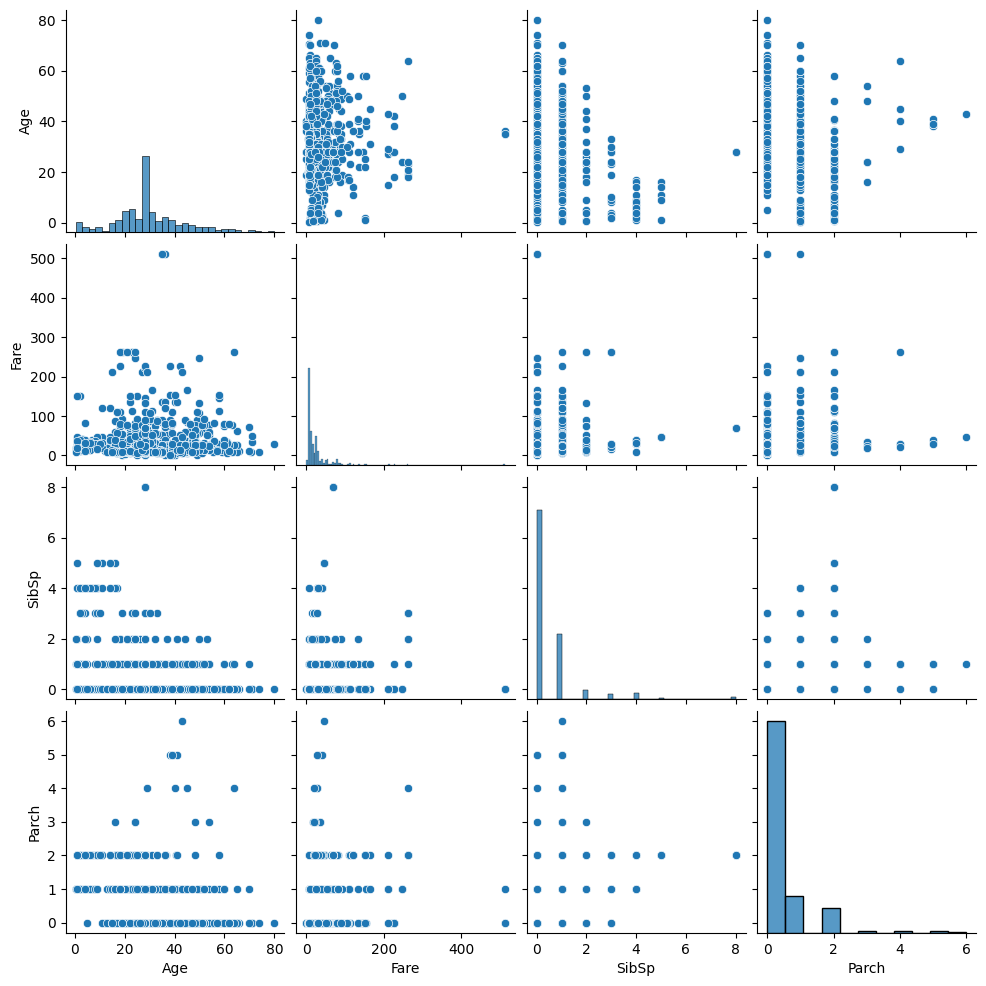

In [62]:
# Pair plot to see relationships between numerical features
sns.pairplot(data_1[['Age', 'Fare', 'SibSp', 'Parch']])
plt.show()

In [63]:
data_1.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.131900,0.221009,0.074053
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163,-0.031415,-0.006729
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.068734
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.060814
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.162184
Sex_male,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.119224
Embarked_Q,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,-0.006729,0.068734,0.060814,-0.162184,0.119224,-0.499421,1.000000


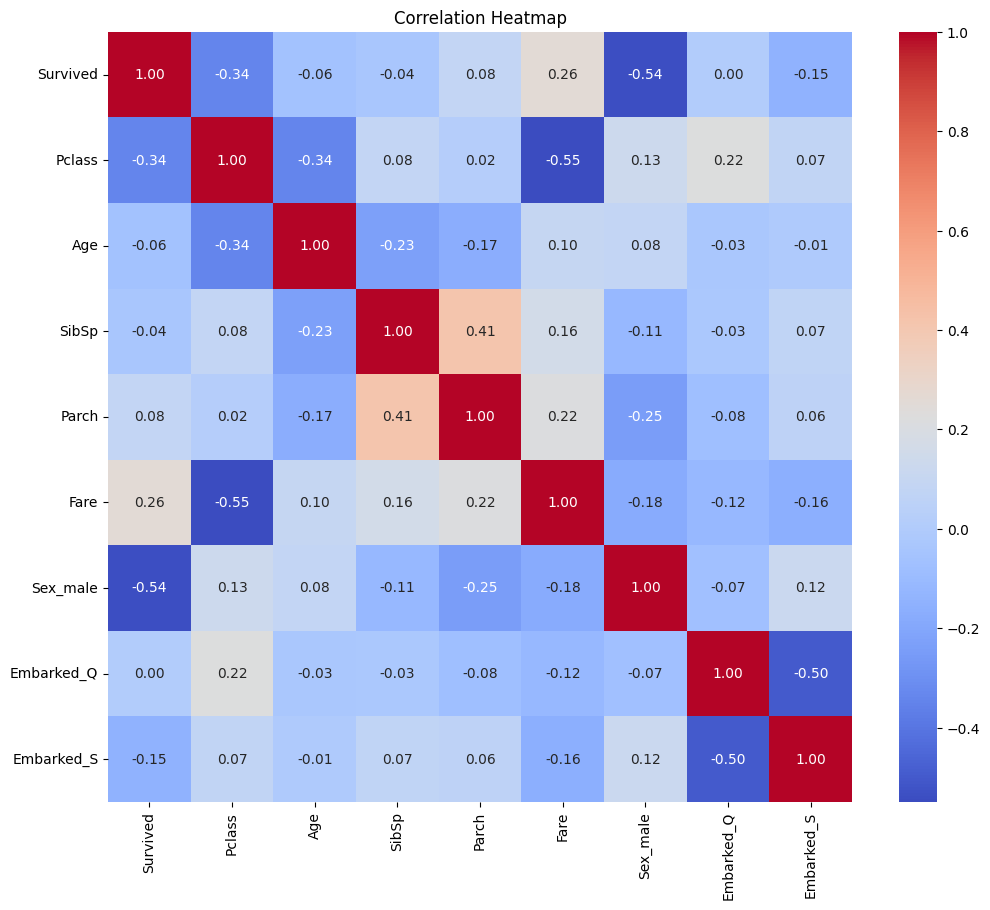

In [64]:
# Correlation heat map

corr = data_1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [65]:
# Defining final data for analysis
final_data = data_1
final_data.shape

(891, 9)

### Model Training

#### Note: Since the Titanic_test.csv do not have survival column, I splited Titanic_train.cs data into 80:20 ratio. I will use the test data for prediction.

In [66]:
# Define features and target variable
X = final_data.drop('Survived', axis=1)
y = final_data['Survived']

# Split the data into training and testing sets with an 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 712
Testing set size: 179


In [67]:
# Create a logistic regression model
logreg = LogisticRegression(max_iter=200)

# Train the model using the training data
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [68]:
# Predict on the testing data
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
confusion_m = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print performance metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print()
print("Confusion Matrix")
print(confusion_m)
print()
print("classification_report")
print(class_report)

Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1-Score: 0.76
ROC-AUC Score: 0.88

Confusion Matrix
[[90 15]
 [19 55]]

classification_report
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



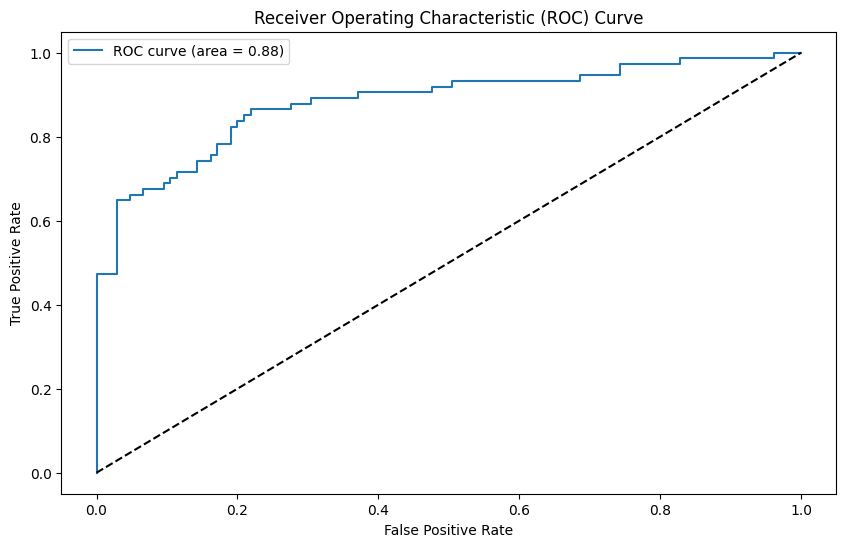

In [69]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

### Evaluation Metrics

**Accuracy: 0.81**<br>
The model correctly predicts survival in 81% of the cases.<br>

**Precision: 0.79**<br>
Of all passengers predicted to survive, 79% actually survived.<br>

**Recall: 0.74**<br>
The model correctly identifies 74% of all actual survivors.<br>

**F1-Score: 0.76**<br>
The F1-score, which balances precision and recall, is 0.76, indicating a good balance between these two metrics.<br>

**ROC-AUC Score: 0.88**<br>
The high ROC-AUC score indicates that the model has good discriminatory ability between survivors and non-survivors.<br>

In [70]:
# Get the coefficients and feature names
coefficients = logreg.coef_[0]
features = X.columns

# Create a DataFrame for better visualization
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coeff_df['Abs_Coefficient'] = np.abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coeff_df[['Feature', 'Coefficient']])

      Feature  Coefficient
5    Sex_male    -2.596040
0      Pclass    -0.936877
7  Embarked_S    -0.401927
2       SibSp    -0.295268
3       Parch    -0.108959
6  Embarked_Q    -0.108193
1         Age    -0.030533
4        Fare     0.002594


### Interpretion of the Coefficients of the Logistic Regression Model
The coefficients of the logistic regression model indicate the impact of each feature on the log-odds of the target variable (survival). A positive coefficient increases the log-odds of survival, while a negative coefficient decreases it.<br>

**Sex_male: -2.590814**<br>
This is a significant negative coefficient, suggesting that being male drastically reduces the probability of survival compared to being female (since females are the reference category).<br>

**Pclass: -0.937866**<br>
This negative coefficient indicates that higher class numbers (i.e., lower socio-economic status) are associated with a lower probability of survival. Passengers in 3rd class had a lower chance of survival compared to those in 1st or 2nd class. <br>

**Embarked_S: -0.399520**<br>
Passengers who embarked from Southampton had a lower probability of survival compared to those who embarked from the reference category (Cherbourg).

**SibSp: -0.294949**<br>
Having more siblings or spouses aboard decreases the probability of survival slightly.<br>

**Embarked_Q: -0.111744**<br>
Passengers who embarked from Queenstown had a slightly lower probability of survival compared to those who embarked from Cherbourg.<br>

**Parch: -0.108799**<br>
Having more parents or children aboard slightly decreases the probability of survival.<br>

**Age: -0.030587**<br>
Older age is associated with a lower probability of survival, though this coefficient is relatively small.<br>

**Fare: 0.002582**<br>
Higher fare paid slightly increases the probability of survival, indicating that passengers who paid higher fares (likely in higher classes) had a better chance of surviving.<br>


### Significance of Features in Predicting the Target Variable (Survival Probability)

**Sex (Sex_male)**<br>
Gender is the most significant predictor of survival. The large negative coefficient for males shows a strong gender disparity in survival rates, with females having a higher likelihood of survival.

**Pclass**<br>
Passenger class is another crucial predictor. The negative coefficient suggests that passengers in lower classes (especially 3rd class) had significantly lower survival rates.
Embarked (Embarked_S and Embarked_Q)

### Conclusion

The model performs well overall, with a high accuracy and ROC-AUC score, and a reasonable balance between precision and recall. The coefficients of the logistic regression model provide insights into the significance of various features in predicting survival probabilities, with gender and passenger class being the most influential.

### Prediction of test data

In [71]:
data_test = pd.read_csv("Titanic_test.csv")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
# Convert categorical variables to numerical (if needed)
data_test['Sex_male'] = data_test['Sex'].apply(lambda x: 1 if x == 'male' else 0)
data_test['Embarked_Q'] = data_test['Embarked'].apply(lambda x: 1 if x == 'Q' else 0)
data_test['Embarked_S'] = data_test['Embarked'].apply(lambda x: 1 if x == 'S' else 0)

# Droping columns
data_test = data_test.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId', 'Sex', 'Embarked'])
data_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [73]:
# Checking for Null Values
data_test.isnull().sum()

Pclass         0
Age           86
SibSp          0
Parch          0
Fare           1
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [74]:
# For Age, we'll use the median to fill missing values
data_test['Age'].fillna(data_test['Age'].median(), inplace=True)
data_test.shape

(418, 8)

In [75]:
data_test.dropna(inplace=True)
data_test.shape

(417, 8)

In [76]:
# Prediction of test values

# Make predictions
predictions = logreg.predict(data_test)

# Add predictions to the test data
data_test['Survived'] = predictions

# Display the predictions
print("\nPredictions:")
print(data_test.head(10))


Predictions:
   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  \
0       3  34.5      0      0   7.8292         1           1           0   
1       3  47.0      1      0   7.0000         0           0           1   
2       2  62.0      0      0   9.6875         1           1           0   
3       3  27.0      0      0   8.6625         1           0           1   
4       3  22.0      1      1  12.2875         0           0           1   
5       3  14.0      0      0   9.2250         1           0           1   
6       3  30.0      0      0   7.6292         0           1           0   
7       2  26.0      1      1  29.0000         1           0           1   
8       3  18.0      0      0   7.2292         0           0           0   
9       3  21.0      2      0  24.1500         1           0           1   

   Survived  
0         0  
1         0  
2         0  
3         0  
4         1  
5         0  
6         1  
7         0  
8         1  
9        